# Reporte de MLT de Barcelona Telco

## Problem ha solucionar


## Data

In [ ]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

In [4]:
import time
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import numpy as np

!wget -O ENB2012_data.csv 'https://github.com/marcbonastre/RepoTestGroup3/blob/master/PROYECTO_FINAL/Datasets/Heating%20Cooling%20Building/ENB2012_data.csv?raw=true'
dbEN = pd.read_excel('ENB2012_data.csv',header=0)
print(dbEN.shape)

--2020-07-12 08:16:00--  https://github.com/marcbonastre/RepoTestGroup3/blob/master/PROYECTO_FINAL/Datasets/Heating%20Cooling%20Building/ENB2012_data.csv?raw=true
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/marcbonastre/RepoTestGroup3/raw/master/PROYECTO_FINAL/Datasets/Heating%20Cooling%20Building/ENB2012_data.csv [following]
--2020-07-12 08:16:00--  https://github.com/marcbonastre/RepoTestGroup3/raw/master/PROYECTO_FINAL/Datasets/Heating%20Cooling%20Building/ENB2012_data.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/marcbonastre/RepoTestGroup3/master/PROYECTO_FINAL/Datasets/Heating%20Cooling%20Building/ENB2012_data.csv [following]
--2020-07-12 08:16:00--  https://raw.githubusercontent.com/marcbonastre/RepoTestGroup3/master/PROYECTO_FIN

In [5]:
dbEN.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


X1: Relative Compactness
X2: Surface Area
X3: Wall Area
X4:Roof Area
X5: Overall Height
X6: Orientation
X7: Glazing Area
X8: Glazing Area Distribution
y1: Heating Load
y2: Cooling Load

## Data Exploration

In [ ]:
dbEN.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

In [ ]:
dbEN.rename(columns={'X1': 'Relative Compactness', 'X2': 'Surface Area', 'X3': 'Wall Area', 'X4': 'Roof Area', 'X5': 'Overall Height', 'X6': 'Orientation', 'X7': 'Glazing Area', 'X8': 'Glazing Area Distribution', 'Y1': 'Heating Load', 'Y2': 'Cooling Load'}, inplace=True)
dbEN.head(2)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33


In [ ]:
dbEN.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
dbEN.isnull().values.any()

False

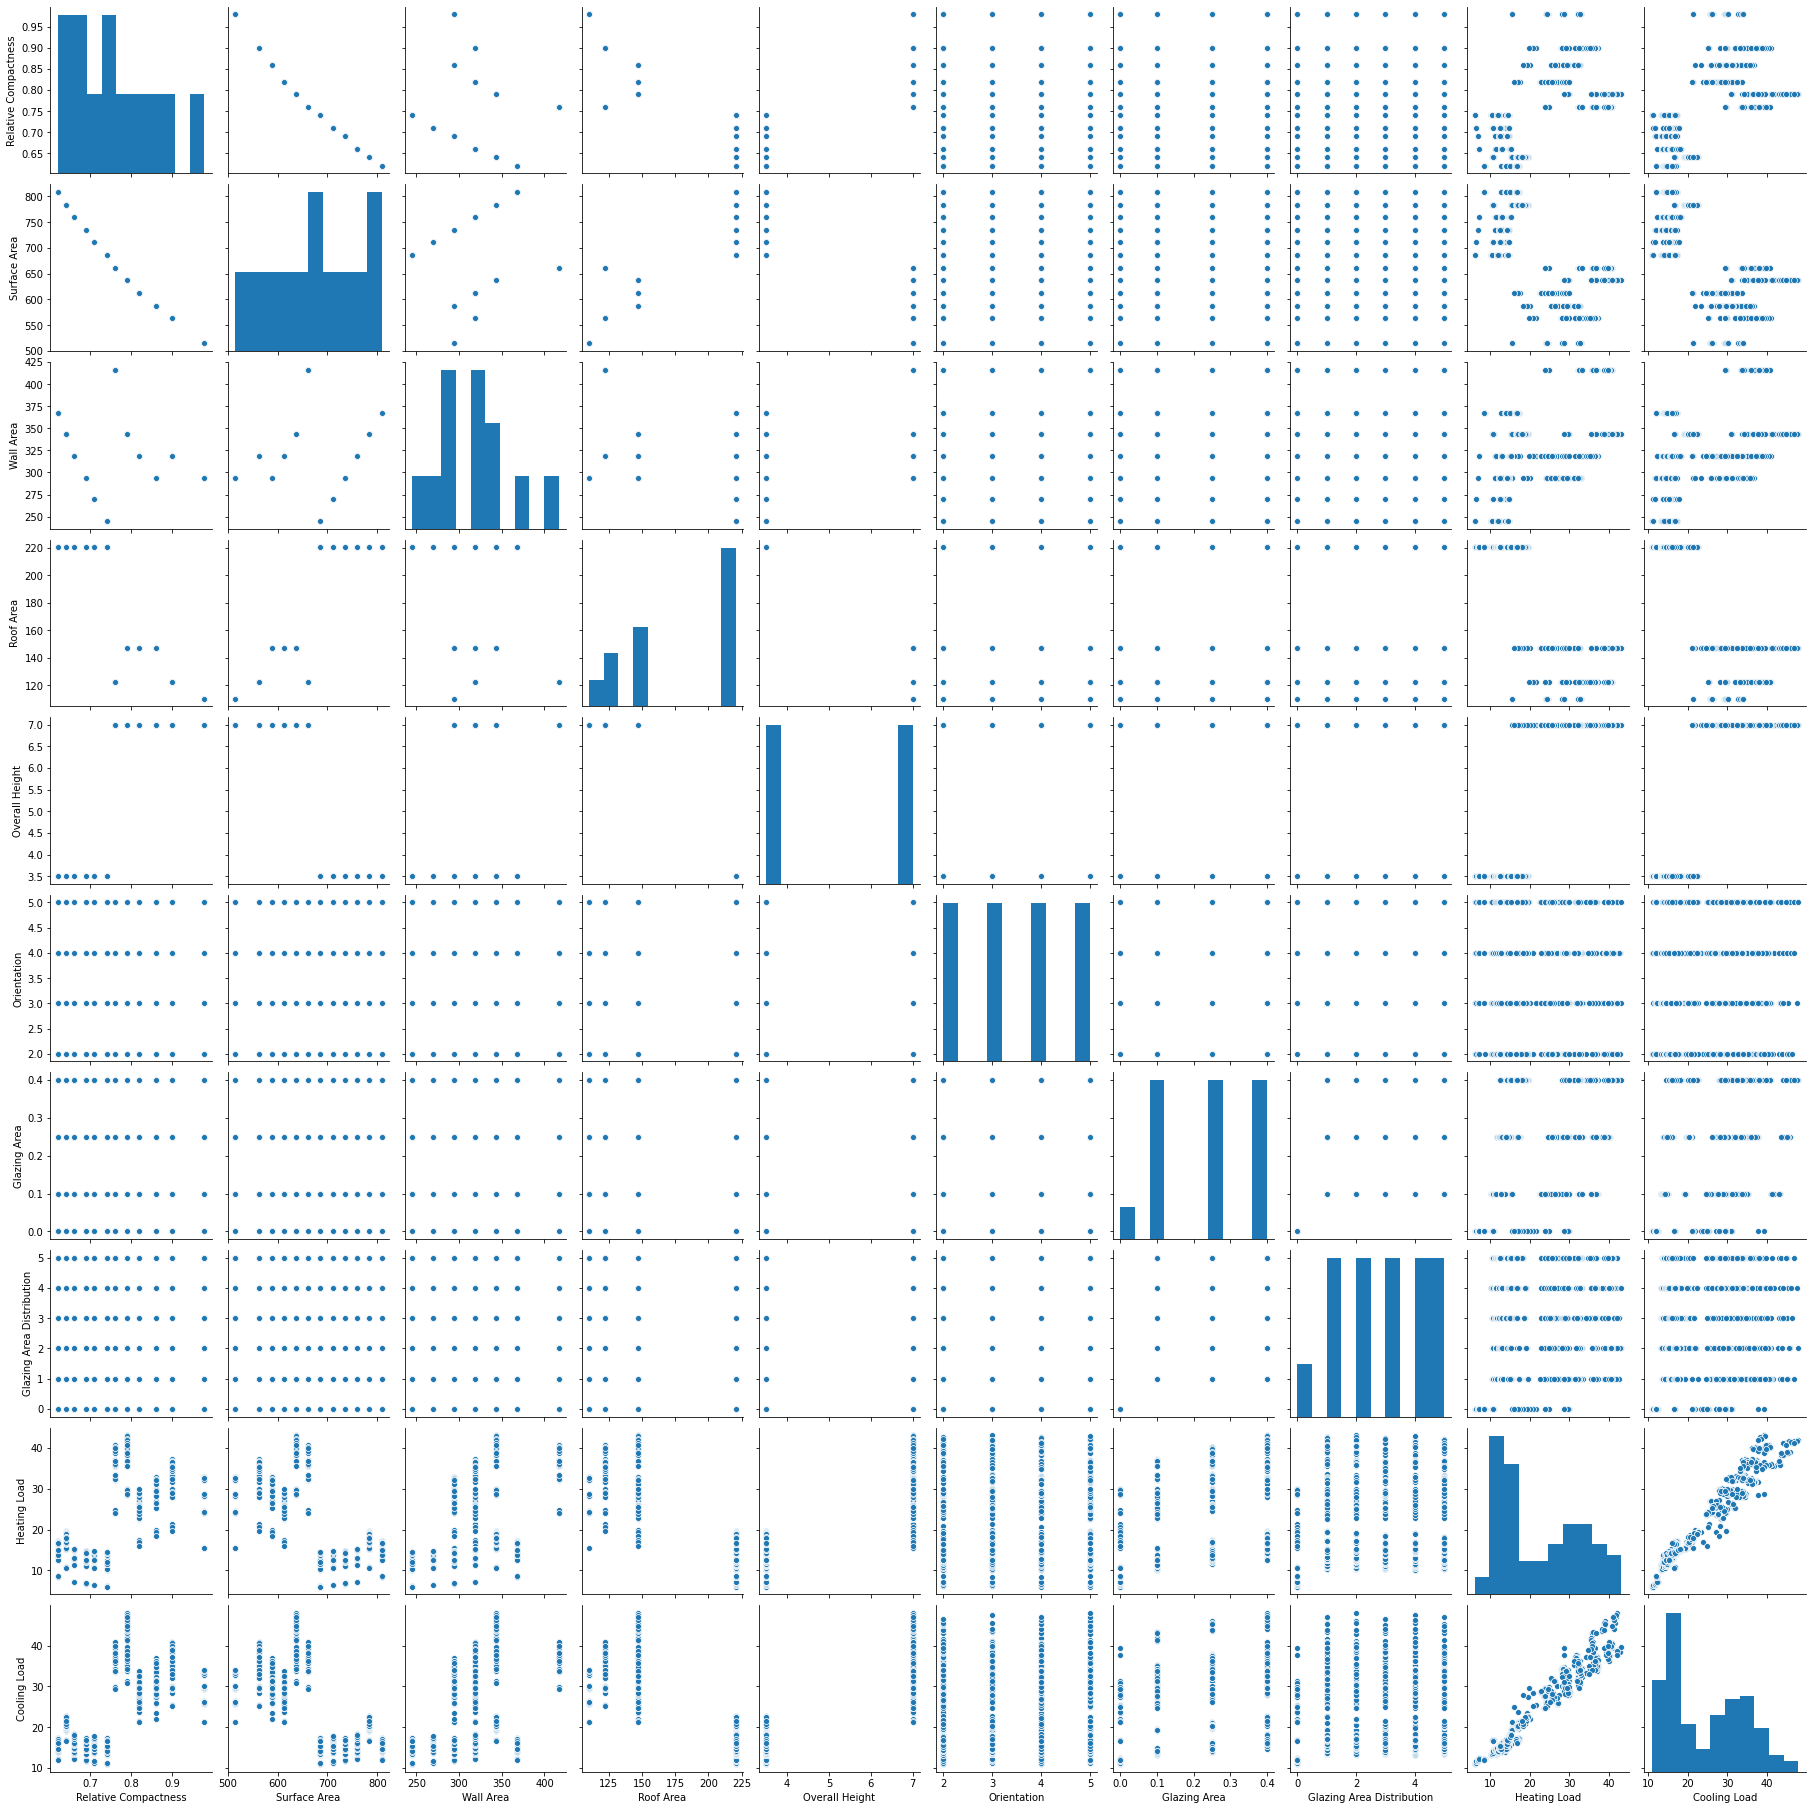

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(dbEN)
plt.show()

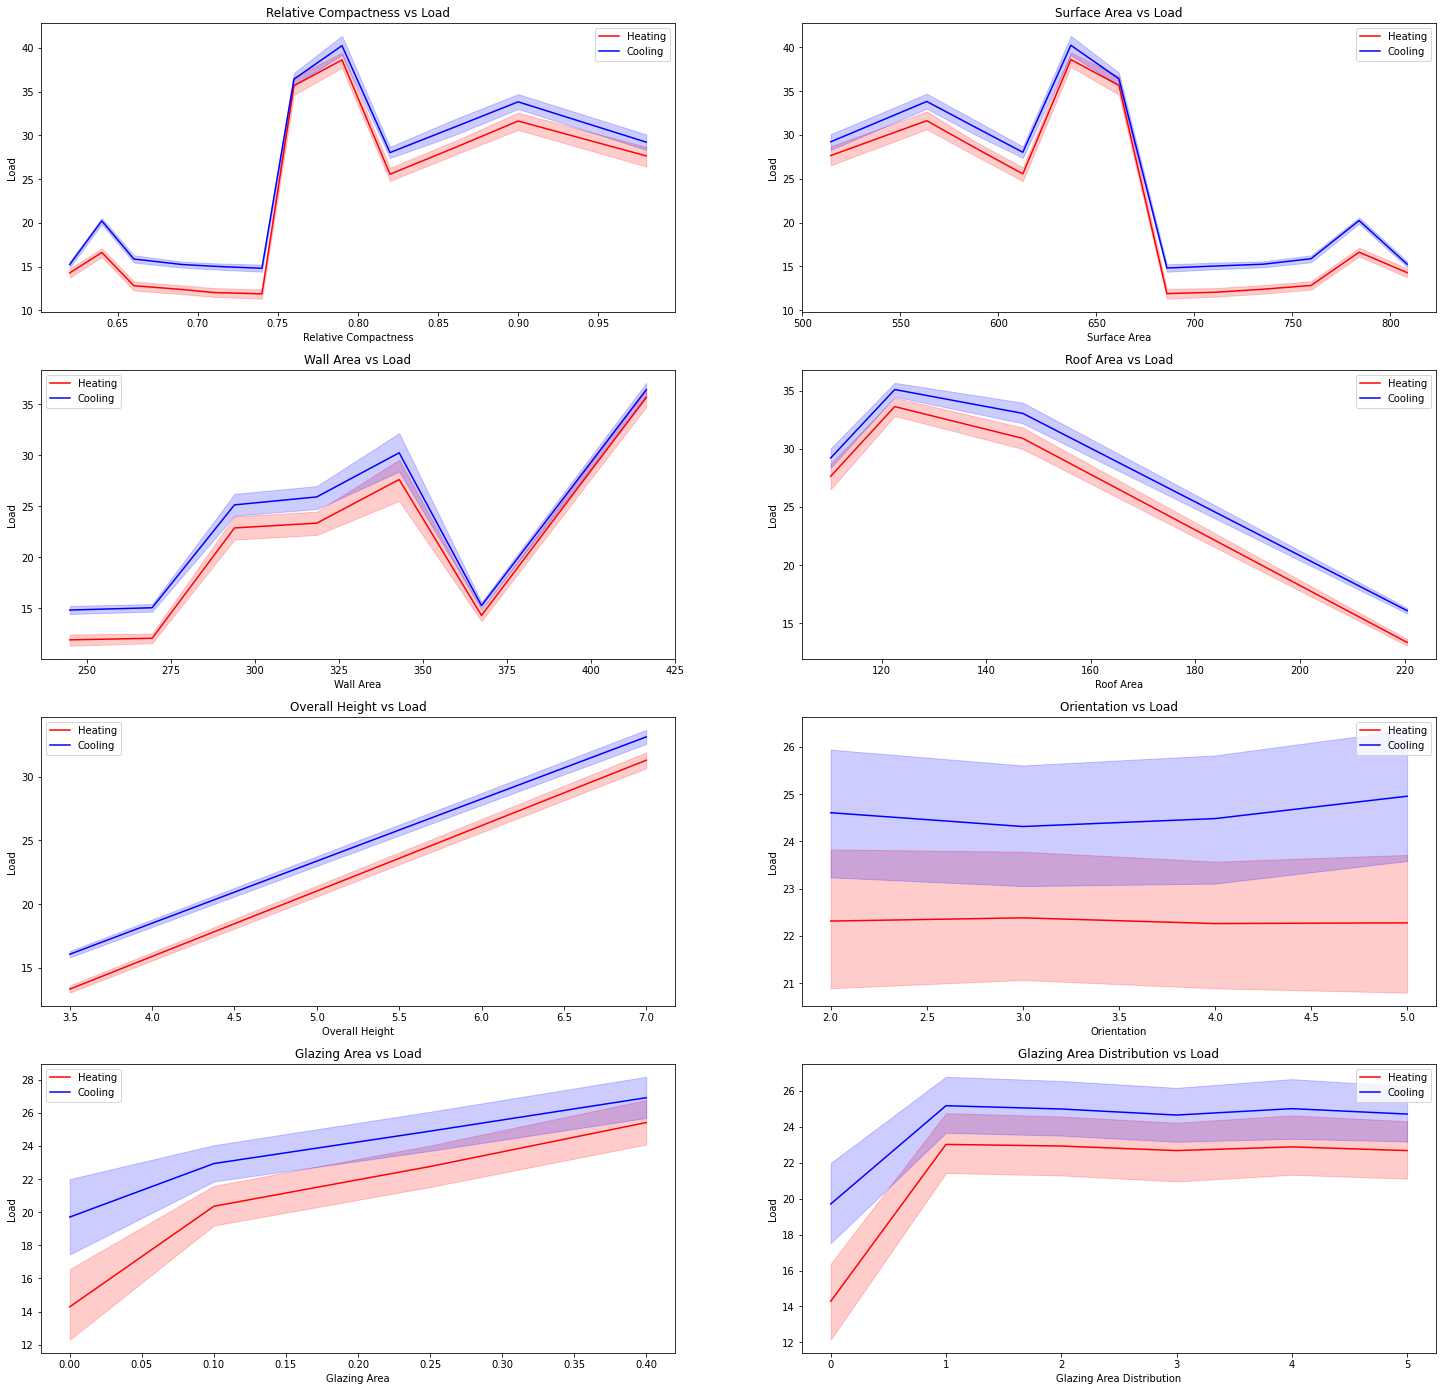

In [ ]:
fig = plt.figure(figsize=(25,50))
ax = fig.add_subplot(821)
ax = sns.lineplot(x='Relative Compactness',y="Heating Load", label='Heating', color="r", data=dbEN)
ax = sns.lineplot(x='Relative Compactness',y="Cooling Load", label='Cooling', color="b",data=dbEN)
ax.set_ylabel('Load')
ax.set_title('Relative Compactness vs Load')
ax.legend()
ax1 = fig.add_subplot(822)
ax1 = sns.lineplot(x='Surface Area',y="Heating Load", label='Heating', color="r", data=dbEN)
ax1 = sns.lineplot(x='Surface Area',y="Cooling Load", label='Cooling', color="b",data=dbEN)
ax1.set_ylabel('Load')
ax1.set_title('Surface Area vs Load')
ax1.legend()
ax2 = fig.add_subplot(823)
ax2 = sns.lineplot(x='Wall Area',y="Heating Load", label='Heating', color="r", data=dbEN)
ax2 = sns.lineplot(x='Wall Area',y="Cooling Load", label='Cooling', color="b",data=dbEN)
ax2.set_ylabel('Load')
ax2.set_title('Wall Area vs Load')
ax2.legend()
ax3 = fig.add_subplot(824)
ax3 = sns.lineplot(x='Roof Area',y="Heating Load", label='Heating', color="r", data=dbEN)
ax3 = sns.lineplot(x='Roof Area',y="Cooling Load", label='Cooling', color="b",data=dbEN)
ax3.set_ylabel('Load')
ax3.set_title('Roof Area vs Load')
ax3.legend()
ax4 = fig.add_subplot(825)
ax4 = sns.lineplot(x='Overall Height',y="Heating Load", label='Heating', color="r", data=dbEN)
ax4 = sns.lineplot(x='Overall Height',y="Cooling Load", label='Cooling', color="b",data=dbEN)
ax4.set_ylabel('Load')
ax4.set_title('Overall Height vs Load')
ax4.legend()
ax5 = fig.add_subplot(826)
ax5 = sns.lineplot(x='Orientation',y="Heating Load", label='Heating', color="r", data=dbEN)
ax5 = sns.lineplot(x='Orientation',y="Cooling Load", label='Cooling', color="b",data=dbEN)
ax5.set_ylabel('Load')
ax5.set_title('Orientation vs Load')
ax5.legend()
ax6 = fig.add_subplot(827)
ax6 = sns.lineplot(x='Glazing Area',y="Heating Load", label='Heating', color="r", data=dbEN)
ax6 = sns.lineplot(x='Glazing Area',y="Cooling Load", label='Cooling', color="b",data=dbEN)
ax6.set_ylabel('Load')
ax6.set_title('Glazing Area vs Load')
ax6.legend()
ax7 = fig.add_subplot(828)
ax7 = sns.lineplot(x='Glazing Area Distribution',y="Heating Load", label='Heating', color="r", data=dbEN)
ax7 = sns.lineplot(x='Glazing Area Distribution',y="Cooling Load", label='Cooling', color="b",data=dbEN)
ax7.set_ylabel('Load')
ax7.set_title('Glazing Area Distribution vs Load')
ax7.legend()
plt.show()

## Algoritmo de Machine Learning

### Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
X = dbEN.iloc[:,0:8]
Y_Heat = dbEN.iloc[:,8:9]
Y_Cool = dbEN.iloc[:,9:10]
Y = dbEN.iloc[:,8:10]

X_train = [] 
X_test = []
y_train =[]
y_test = []

X_train_Heat, X_test_Heat, y_train_Heat, y_test_Heat = train_test_split(X, Y_Heat, test_size=0.2, random_state=42)
X_train_Cool, X_test_Cool, y_train_Cool, y_test_Cool = train_test_split(X, Y_Cool, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_Heat = np.array(X_train_Heat) 
X_test_Heat = np.array(X_test_Heat) 
y_train_Heat = np.array(y_train_Heat) 
y_test_Heat = np.array(y_test_Heat)

X_train_Cool = np.array(X_train_Cool) 
X_test_Cool = np.array(X_test_Cool) 
y_train_Cool = np.array(y_train_Cool) 
y_test_Cool = np.array(y_test_Cool)

X_train = np.array(X_train) 
X_test = np.array(X_test) 
y_train = np.array(y_train) 
y_test = np.array(y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics

RFC = RandomForestRegressor(max_depth = 5, min_samples_split = 4, n_estimators = 500,random_state = 20, n_jobs = -1)
RFC.fit(X_train, y_train)
RFC_Heat = RandomForestRegressor(max_depth = 5, min_samples_split = 4, n_estimators = 500,random_state = 20, n_jobs = -1)
RFC_Heat.fit(X_train_Heat, y_train_Heat)
RFC_Cool = RandomForestRegressor(max_depth = 5, min_samples_split = 4, n_estimators = 500,random_state = 20, n_jobs = -1)
RFC_Cool.fit(X_train_Cool, y_train_Cool)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=20, verbose=0, warm_start=False)

### AutoML

In [ ]:
import autosklearn.classification
import autosklearn.regression
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
)
automl.fit(X_train_Heat, y_train_Heat, dataset_name='dbEN')
#print(automl.show_models())

## Resultados

### Random Forest

In [ ]:
print("R2 buscando solo la Load Heating")
r2test_Heat = RFC_Heat.score(X_test_Heat,y_test_Heat)
r2train_Heat = RFC_Heat.score(X_train_Heat,y_train_Heat)
print("R2 score train:",r2train_Heat)
print("R2 score test:",r2test_Heat)

print("R2 buscando solo la Load Cooling")
r2test_Cool = RFC_Heat.score(X_test_Cool,y_test_Cool)
r2train_Cool = RFC_Heat.score(X_train_Cool,y_train_Cool)
print("R2 score train:",r2train_Cool)
print("R2 score test:",r2test_Cool)

print("R2 buscando las dos Load")
r2test = RFC.score(X_test,y_test)
r2train = RFC.score(X_train,y_train)
print("R2 score train:",r2train)
print("R2 score test:",r2test)

R2 buscando solo la Load Heating
R2 score train: 0.9930514020798674
R2 score test: 0.9894457509093489
R2 buscando solo la Load Cooling
R2 score train: 0.8909900746357754
R2 score test: 0.8859444710604251
R2 buscando las dos Load
R2 score train: 0.9805365696102362
R2 score test: 0.9762575223159571


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [ ]:
train_predict = RFC.predict(X_train)
test_predict = RFC.predict(X_test)

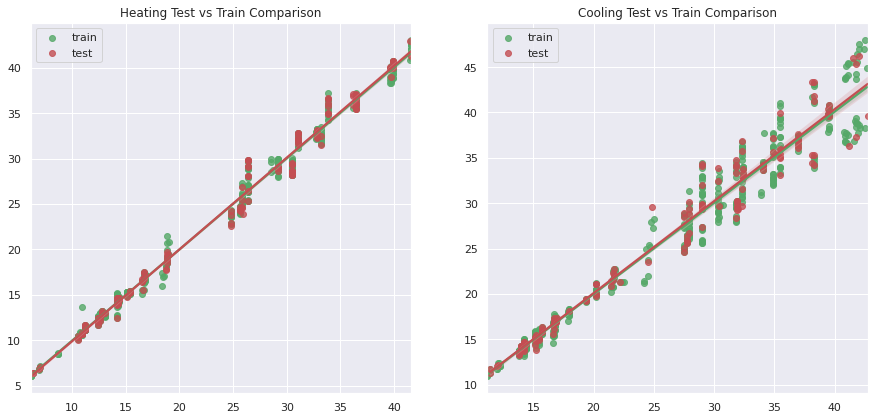

In [ ]:
sns.set(color_codes=True)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(221)
ax = sns.regplot(train_predict[:,0], y_train[:,0], label='train', color = 'g')
ax = sns.regplot(test_predict[:,0], y_test[:,0], label='test', color = 'r')
ax.set_title('Heating Test vs Train Comparison')
ax.legend()

ax2 = fig.add_subplot(222)
ax2 = sns.regplot(train_predict[:,1], y_train[:,1], label='train', color = 'g')
ax2 = sns.regplot(test_predict[:,1], y_test[:,1], label='test', color = 'r')
ax2.set_title('Cooling Test vs Train Comparison')
ax2.legend()


### AutoML

In [ ]:
predictions_automl = automl.predict(X_test_Heat)
print("R2 score:", sklearn.metrics.r2_score(y_test_Heat, predictions_automl))

R2 score: 0.997640907180108


In [ ]:
test_prediction_automl = automl.predict(X_train_Heat)
train_errors_automl=abs(test_prediction_automl - y_train_Heat)
print('Mean Absolute Error de Train:', round(np.mean(train_errors_automl), 2), 'load.')
train_mape_automl = 100 * (train_errors_automl / y_train_Heat)
train_accuracy_automl = 100 - np.mean(train_mape_automl)
print('Train Accuracy:', round(train_accuracy_automl, 2), '%.')

test_prediction_automl = automl.predict(X_test_Heat)
test_errors_automl=abs(test_prediction_automl - y_test_Heat)
print('Mean Absolute Error de Test:', round(np.mean(test_errors_automl), 2), 'load.')
test_mape_automl = 100 * (test_errors_automl / y_test_Heat)
test_accuracy_automl = 100 - np.mean(test_mape_automl)
print('Test Accuracy:', round(test_accuracy_automl, 2), '%.')

Mean Absolute Error de Train: 11.29 load.
Train Accuracy: 38.39 %.
Mean Absolute Error de Test: 11.57 load.
Test Accuracy: 36.43 %.


 ## Discusión y Conclusiones

## Linias de desarrollo futuro

### Annexo 1


### Annexo 2